## MiniProyecto 1 

Juan Lorthiois 18771

Elder 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random

### Codigo ejercicio 1

#### Inciso 2

In [11]:
# Definimos un funcion que asigna a cada cantidad de eventos, la probabilidad de que ocurra dicha cantidad respecto a un lambda

def Poisson(N_eventos, lmbda):
    
    prob = (((lmbda)**(N_eventos))*np.exp(- lmbda))/np.math.factorial(N_eventos)
    
    return prob

In [12]:
# Definimos el listado de los eventos a analizar (No de huracanes de 0 a 16 posibles huracanes)

Posibles_Nos_huracanes = [i for i in range(0,17)]



In [13]:
# calculamos las probabilidades respectivas para cada evento

frecuencia = 7

Prob_huracanes = [Poisson(i, frecuencia) for i in Posibles_Nos_huracanes]

Text(0.5, 1.0, 'PMF 16 Huracanes en 1 año')

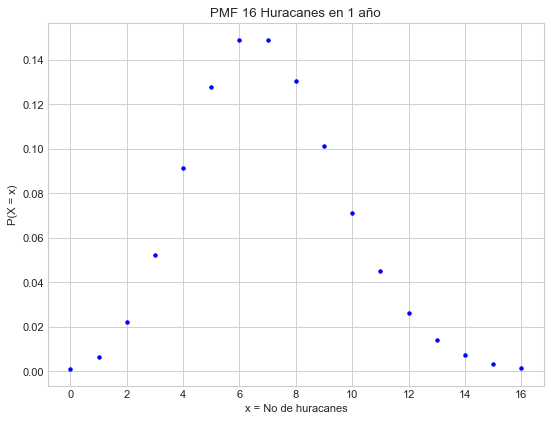

In [17]:
# Graficamos la distribucion de probabilidades (PMF)

figure(figsize=(8, 6), dpi=80)
plt.style.use('seaborn-whitegrid')
plt.plot(Posibles_Nos_huracanes, Prob_huracanes, '.b' )
plt.xlabel('x = No de huracanes')
plt.ylabel('P(X = x)')
plt.title('PMF 16 Huracanes en 1 año')

#### Inciso 3: Como la variable aleatoria es discreta, entonces la CDF resulta ser una función definida por tramos.

In [63]:
# Preparamos la CDF


CDF_vals = [Prob_huracanes[0] + Prob_huracanes[1]]

for i in range(2, len(Prob_huracanes)):
    suma = CDF_vals[-1] + Prob_huracanes[i]
    CDF_vals.append(suma)

In [64]:
len(CDF_vals)

16

In [68]:
def CDF(x):
    for i in range(0,16):
        
        if (i <= x and x < i+1):
            return CDF_vals[i]
        
        elif( i == 16):
            return CDF_vals[15]

In [69]:
x_CDF = np.linspace(0,16, 1000)

In [70]:
y_CDF = [CDF(j) for j in x_CDF]

Text(0.5, 1.0, 'CDF 16 Huracanes en 1 año')

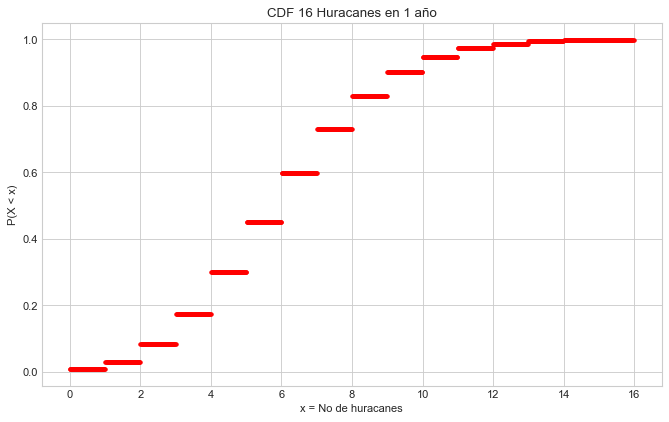

In [76]:
# Graficamos la distribucion de probabilidades (PMF)

figure(figsize=(10, 6), dpi=80)
plt.style.use('seaborn-whitegrid')
plt.plot(x_CDF , y_CDF , '.r' )
plt.xlabel('x = No de huracanes')
plt.ylabel('P(X < x)')
plt.title('CDF 16 Huracanes en 1 año')

### Codigo ejercicio 2

#### Inciso 2: 

Dado que anteriormente ya se definio una funcion para calcular probabilidades de Poisson la reutilizamos aqui con parametros lambda = 2 y sobre un array de valores de 0  a 100 para saber la probabilidad de que haya 0, 1, 2, ..., 100 buses en 30 minutos.

In [73]:
#Definimos los parametros de la funcion y el listado de valores de la variable aleatoria para los cuales calcularemos las probabildiades

lambda_2 = 2

vals_X = [i for i in range(0, 101)]

Probabilidades_por_bus = [Poisson(i, lambda_2) for i in vals_X]

Text(0.5, 1.0, 'PMF No de buses en 30 minutos')

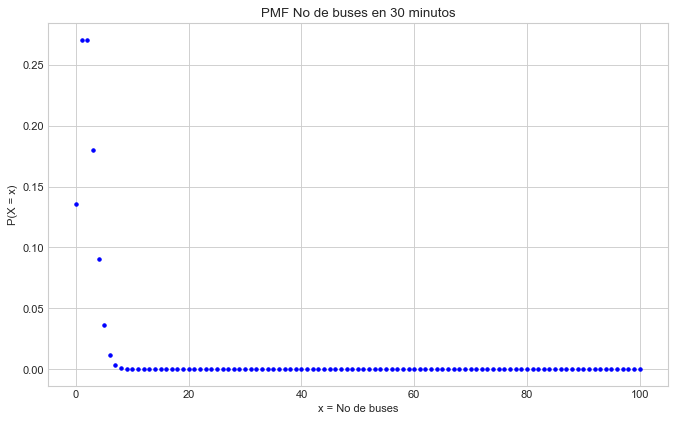

In [77]:
#graficamos la distribucion

figure(figsize=(10, 6), dpi=80)
plt.style.use('seaborn-whitegrid')
plt.plot(vals_X , Probabilidades_por_bus , '.b' )
plt.xlabel('x = No de buses')
plt.ylabel('P(X = x)')
plt.title('PMF No de buses en 30 minutos')


### Codigo ejercicio 3

Primero definiremos la funcion que representa la CDF inversa, y luego la aplicaremos a 10 valores aleatorios, y 500 como lo piden los incisos 1 y 3 del ejercicio

#### Inciso 1

In [50]:
# Definimos la función CDF inversa

def CDF_inv(t, lmbda):
    
    a = -((np.log(1-t))/lmbda)
    
    return a

In [51]:
#  Generamos 10 valores aleatorios entre 0 y 1:

random_vals_10 = []

for i in range(0,10):
    random_vals_10.append(random.random())

In [52]:
# Generamos el listado de imagnes de CDF bajo la CDF inversa

imagenes_vals_10_CDF_inv = [CDF_inv(i, 5 ) for i in random_vals_10]


In [53]:
random_vals_10

[0.5758923480748245,
 0.8092946094157917,
 0.19580230946923505,
 0.06272030423673136,
 0.3100794293289816,
 0.41351265674651416,
 0.029146940261502552,
 0.8903759623772944,
 0.15486235844363072,
 0.1848448803492445]

In [54]:
imagenes_vals_10_CDF_inv

[0.17155359198527692,
 0.33140509988446476,
 0.04358203125657835,
 0.012954707987634581,
 0.07423576059732143,
 0.10672083825038403,
 0.005916030187754769,
 0.4421397214281176,
 0.0336511550948364,
 0.040875370598414354]

In [21]:
# Generamos la tabla de valores 


for i in range(0, len(random_vals_10)):
    
    print('        t= {:1f}    F^-1(t) = {:1f}'.format(random_vals_10[i], imagenes_vals_10_CDF_inv[i]))




        t= 0.327875    F^-1(t) = 0.079462
        t= 0.658563    F^-1(t) = 0.214918
        t= 0.298994    F^-1(t) = 0.071048
        t= 0.069429    F^-1(t) = 0.014391
        t= 0.322223    F^-1(t) = 0.077787
        t= 0.808516    F^-1(t) = 0.330590
        t= 0.147058    F^-1(t) = 0.031813
        t= 0.234692    F^-1(t) = 0.053495
        t= 0.536580    F^-1(t) = 0.153824
        t= 0.232361    F^-1(t) = 0.052887


#### Inciso 2

In [43]:
# Definiimos la CDF de la variable aleatoria exponencial

def CDF(t, lmbd):
    
    a = 1-np.exp(-lmbd*t)
    return a

In [44]:
# generamos un conjunto (continuo) de valores entre 0 y 500

t = np.linspace(0,1, 2000)

In [45]:
CDF_t = [CDF(i, 5) for i in t]

Text(0.5, 1.0, 'Grafica de la CDF para la variable exponencial')

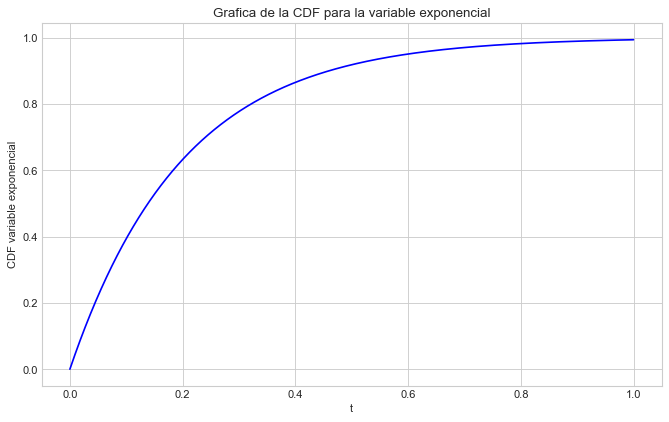

In [46]:
#graficamos la CDF exopnencial

figure(figsize=(10, 6), dpi=80)
plt.style.use('seaborn-whitegrid')
plt.plot(t , CDF_t , '-b' )
plt.xlabel('t')
plt.ylabel('CDF variable exponencial')
plt.title('Grafica de la CDF para la variable exponencial')

#### Inciso 3

Ahora generamos de la misma forma que en el inciso 1 los valores aleatorios entre 0 y 1 para los primeros 500 pacientes, para lueego evaluar la CDF inversa sobre estos valores y generar la gráfica

In [47]:
# Definimos los 500 valores aleatorios

random_vals_500 = []

for i in range(0,500):
    random_vals_500.append(random.random())

In [48]:
# Calculamos las imagenes de los 500 valores aleatorios bajo la CDF inversa

imagenes_vals_500_CDF_inv = [CDF_inv(i, 5 ) for i in random_vals_500]

Text(0.5, 1.0, 'CDF inversa para los primeros 500 pacientes')

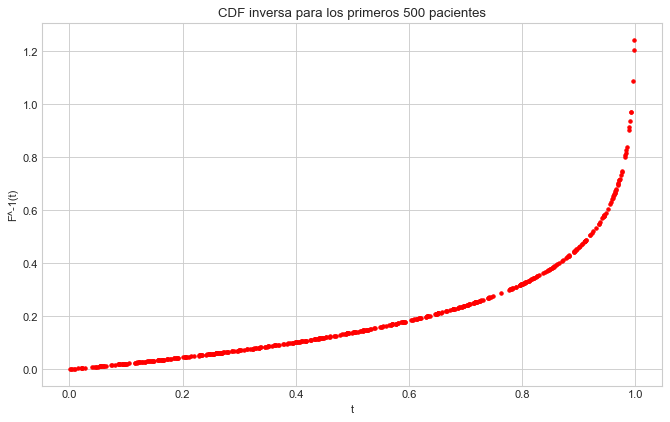

In [49]:
#graficamos la CDF inversa para los 500 primeros pacientes

figure(figsize=(10, 6), dpi=80)
plt.style.use('seaborn-whitegrid')
plt.plot(random_vals_500 , imagenes_vals_500_CDF_inv , '.r' )
plt.xlabel('t')
plt.ylabel('F^-1(t)')
plt.title('CDF inversa para los primeros 500 pacientes')